# Lecture 22: Bar Plots and Scatter Plots

In [50]:
# import statements
import pandas as pd
from pandas import DataFrame, Series
import sqlite3
import os
import requests

#### Warmup 1: Create a database called student_grades.db with a single table called grades

In [2]:
# establish connection to a new database
grades_conn = sqlite3.connect("student_grades.db")

# Q: When outer data structure is a dictionary, are inner data structures
#    rows or columns of the DataFrame table?
# A: columns

df = pd.DataFrame({
    "name": [
        "Cole",
        "Cynthia",
        "Alice",
        "Seth"
    ],
    "grade": [
        "C",
        "AB",
        "B",
        "BC"
    ],
    "gpa": [
        2.0,
        3.5,
        3.0,
        2.5
    ],
    "attendance": [
        4,
        11,
        10,
        6
    ]
})

# convert the DataFrame to sql database
df.to_sql("grades", con = grades_conn, if_exists = "replace", index = False)

4

#### Warmup 2: What are the columns of our table? What are their datatypes?

In [3]:
query = "SELECT * FROM sqlite_master"

df = pd.read_sql(query, grades_conn)
print(df['sql'].iloc[0])

# name is TEXT (in Python, str)
# grade is TEXT (in Python, str)
# gpa is REAL (in Python, float)
# attendance is INTEGER (in Python, int)

CREATE TABLE "grades" (
"name" TEXT,
  "grade" TEXT,
  "gpa" REAL,
  "attendance" INTEGER
)


#### Warmup 4: What is the data in "grades" table? 
Save this to a variable called "student_grades" and display it.

In [4]:
student_grades = pd.read_sql("SELECT * FROM grades", grades_conn)
student_grades

name grade  gpa  attendance
0     Cole     C  2.0           4
1  Cynthia    AB  3.5          11
2    Alice     B  3.0          10
3     Seth    BC  2.5           6

#### Warmup 5: Make a scatter plot where the attendance of a student is on the x-axis and their gpa on the y-axis
Preview to upcoming topic

<Axes: xlabel='attendance', ylabel='gpa'>

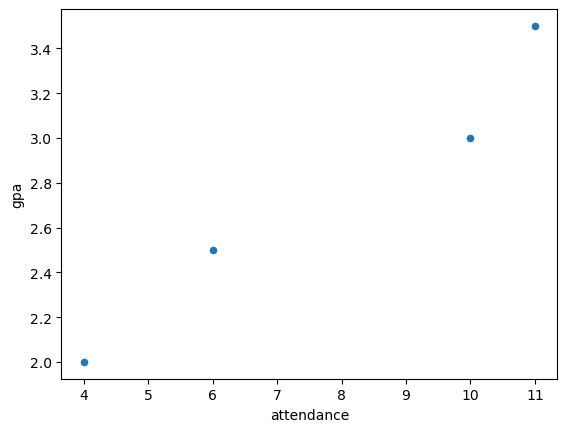

In [5]:
student_grades.plot.scatter(x = "attendance", y = "gpa")

#### Warmup 6: What is the correlation between gpa and attendance?

In [6]:
student_grades.corr()

/var/folders/07/v8h5vw9j6v71xlj9rgbrh5h40000gn/T/ipykernel_74543/3765178056.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  student_grades.corr()


gpa  attendance
gpa         1.000000    0.976831
attendance  0.976831    1.000000

#### Warmup 7: Close the connection.

In [7]:
grades_conn.close()

## Bar plots



Learning Objectives:
- Make a bar plot from a Pandas Series
- Add features: x-label, y-label, title, gridlines, color to plot
- Set the index of a DataFrame certain column
- Create an 'other' column in a DataFrame


In [8]:
# Without this Jupyter notebook cannot display the "first" plot in older versions 
# of Python / mathplotlib / jupyter
%matplotlib inline

### Helpful documentation and an overview of how matplotlib works
https://matplotlib.org/stable/tutorials/introductory/usage.html


***Just for today's lecture, let's have import statements inside the notebook file. You should never do this when you write project code***

In [12]:
# matplotlib is a plotting module similar to MATLAB
import matplotlib
from matplotlib import pyplot as plt

# matplotlib is highly configurable, acts like a style sheet for plots
# rc stands for runtime config, syntax is like a dictionary

# matplotlib.rcParams                       # show all parameters
# matplotlib.rcParams["font.size"]          # show current font size setting
matplotlib.rcParams["font.size"] = 12      # change current font size setting

## Plots from pandas Series

- matplotlib integrates with pandas, just like sqlite3 integrates with pandas
- Syntax: ```Series.plot.<PLOT_FUNCTION>(...)```

## Bar plots: From a Series
- Series indices are the x-axis labels
- Series values are the height of each bar

https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html

In [13]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})

# What are the three terminologies associated with pandas Series?
# A: Index and Integer Position and Value

# make a bar plot...notice the type
s.plot.bar()

<Axes: >

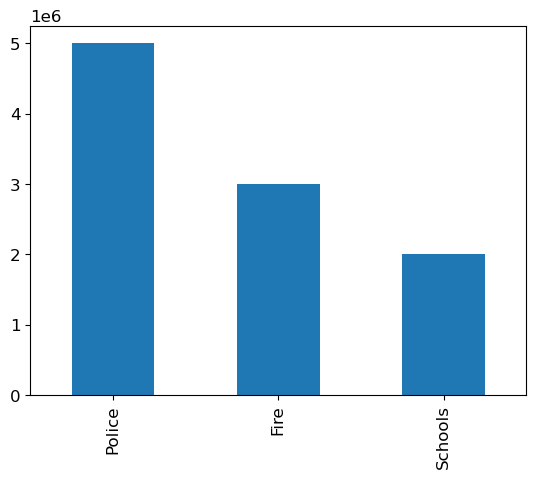

In [15]:
# if we store the returned object in a variable, we can configure the AxesSubplot
# typically the variable name used is 'ax'
ax = s.plot.bar()

### How can we set the x-axis, y-axis labels, and title?
- plotting functions return what is called as AxesSubplot
- store into a variable and use the AxesSubplot object
- Syntax:
```
ax.set_ylabel("...")
ax.set_xlabel("...")
ax.set_title("...")
```

Text(0.5, 1.0, 'Annual City Spending')

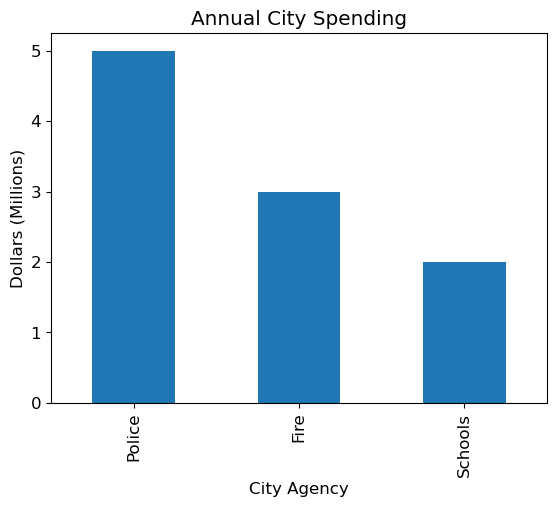

In [17]:
# What is this 1e6? Can we get rid of it?
# Instead of 1e6, divide all values in s by 1000000 (1 million)
# better plot:
ax = (s / 1000000).plot.bar()

# set the y label to "Dollars (Millions)"
ax.set_ylabel("Dollars (Millions)")

# set the x label to "City Agency"
ax.set_xlabel("City Agency")

# this is self-explanatory, so we will skip this for other example plots

# set the title to "Annual City Spending"
ax.set_title("Annual City Spending") 


### How can we rotate the x-axis labels so that they are more readable?

In [18]:
s

Police     5000000
Fire       3000000
Schools    2000000
dtype: int64

Which aspect of the Series is the x-axis label coming from?

In [19]:
# Answer:  Index

How can we extract the indices from a Series?

In [20]:
s.index

Index(['Police', 'Fire', 'Schools'], dtype='object')

Now let's use that to set x-axis tick label formatting.
- Syntax:
```
ax.set_xticklabels(<list of x-axis labels>, rotation = ???)
```

[Text(0, 0, 'Police'), Text(1, 0, 'Fire'), Text(2, 0, 'Schools')]

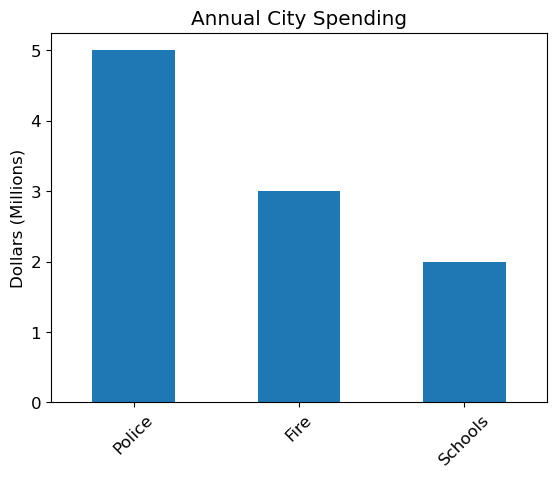

In [21]:
ax = (s / 1000000).plot.bar()
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

# give the x ticklabels a rotation of 45 degrees
ax.set_xticklabels(list(s.index), rotation = 45)

### How can we change the figure size?
- figsize keyword argument
- should be a tuple with two values: width and height (in inches)



In [22]:
ax = (s / 1000000).plot.bar(figsize=(12,6))
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

### How can we make the bars horizontal?
https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.barh.html
- switch figsize arguments
- change y-label to x-label

Text(0.5, 1.0, 'Annual City Spending')

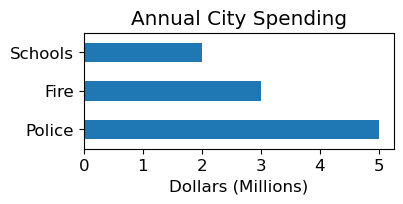

In [25]:
# paste the previous code cell here and modify
ax = (s / 1000000).plot.barh(figsize = (4, 1.5))
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### Change bar color by using the argument color = ' ' 
- Syntax: ``` plot.bar(figsize = (width, height), color = ???)```
- 8 standard colors: r, g, b, c, m, y, k, w    (for example: ```color = 'k'```, which is black)
    - you could also specify the entire color as a string (for example: ```color = 'red'```)
- can use value of grey between 0 and 1        (for example: ```color = '0.6'```)
- can use a tuple (r, g, b) between 0 and 1      (for example: ```color = (0, .3, .4)```)

Text(0.5, 1.0, 'Annual City Spending')

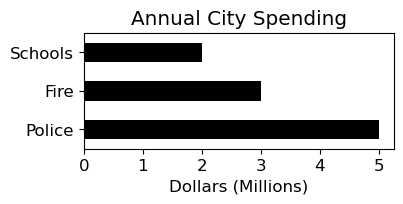

In [29]:
# color as a single char 
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = 'k') # black color
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

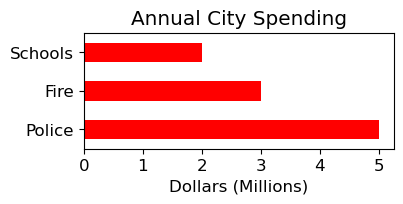

In [27]:
# color as a str
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = 'red') # red color
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

In [30]:
# color as tuple of (r, g, b)
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = (.2, .5, 0))
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

### How can we mark gridlines?
- use ax.grid()

In [31]:
# copy the previous code and add grid lines
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = 'b')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
ax.grid()


## Examples with the Bus Route Database

In [32]:
path = "bus.db"

# assert existence of path
assert os.path.exists(path)

# establish connection to bus.db
conn = sqlite3.connect(path)

### Find the tables in `bus.db`

In [33]:
pd.read_sql("""
SELECT *
FROM sqlite_master
WHERE type = 'table'
""", conn)

type      name  tbl_name  rootpage  \
0  table  boarding  boarding         2   
1  table    routes    routes        55   

                                                 sql  
0  CREATE TABLE "boarding" (\n"index" INTEGER,\n ...  
1  CREATE TABLE "routes" (\n"index" INTEGER,\n  "...

In [34]:
pd.read_sql("""
SELECT * from
boarding
""", conn)

index  StopID  Route        Lat        Lon  DailyBoardings
0         0    1163     27  43.073655 -89.385427            1.03
1         1    1163     47  43.073655 -89.385427            0.11
2         2    1163     75  43.073655 -89.385427            0.34
3         3    1164      6  43.106465 -89.340021           10.59
4         4    1167      3  43.077867 -89.369993            3.11
...     ...     ...    ...        ...        ...             ...
3967   3967    6533     67  43.057329 -89.510756           16.88
3968   3968    6539     15  43.064361 -89.517233           15.53
3969   3969    6541      3  43.049934 -89.478167            2.56
3970   3970    6543     70  43.093289 -89.501726            0.11
3971   3971    6543     71  43.093289 -89.501726            6.73

[3972 rows x 6 columns]

#### What are the top routes, and how many people ride them daily?

In [35]:
df = pd.read_sql("""
    SELECT route, SUM(DailyBoardings) as daily
    FROM boarding
    GROUP BY route
    ORDER BY daily DESC
""", conn)
df

Route     daily
0      80  10211.79
1       2   4808.03
2       6   4537.02
3      10   4425.23
4       3   2708.55
5       4   2656.99
6      15   2179.98
7      38   1955.85
8      28   1868.31
9       5   1634.69
10     14   1373.81
11     16   1258.93
12     18   1039.57
13     22    995.21
14     19    827.53
15     50    748.75
16     67    729.54
17     70    710.80
18     30    687.13
19     72    636.95
20     13    615.20
21     40    602.92
22     21    590.86
23     20    545.91
24     71    497.09
25     56    477.44
26     57    464.86
27     73    448.87
28     75    435.35
29     44    416.90
30     11    392.43
31     47    379.89
32     81    371.76
33     58    362.59
34     12    329.51
35     37    319.82
36     27    298.07
37     17    294.55
38     82    219.48
39     33    206.53
40      1    181.44
41     52    176.24
42     39    140.89
43     35    140.42
44     31    139.87
45     51    137.57
46     55    129.23
47     84    114.21
48     29    111.28
49     26    107.10
50     32     86.47
51     34     81.97
52     49     61.83
53     36     59.13
54     48     30.65
55     25     24.19

#### Let's take the daily column out as a Series ...

<Axes: >

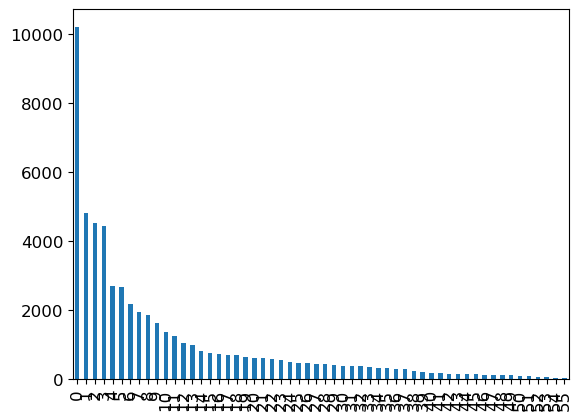

In [36]:
s = df['daily']
s.plot.bar()

### Oops, too much data. Let's filter down to top 5 routes. How can we do that in SQL?

In [37]:
# TODO: add the appropriate SQL clause
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
LIMIT 5
""", conn)
df

Route     daily
0     80  10211.79
1      2   4808.03
2      6   4537.02
3     10   4425.23
4      3   2708.55

Now, plot this!

In [38]:
s = df['daily']
s.plot.bar()

<Axes: >

#### Huh, what exactly is route 0? Where is that coming from?
Q: Can you guess where it is coming from? 

A: It is coming from dataframe row index!

In [39]:
df

Route     daily
0     80  10211.79
1      2   4808.03
2      6   4537.02
3     10   4425.23
4      3   2708.55

#### Let's fix that: we can use df.set_index(...)
- set_index returns a brand new DataFrame object instance

In [40]:
df = df.set_index('Route')
df

daily
Route          
80     10211.79
2       4808.03
6       4537.02
10      4425.23
3       2708.55

And now plot this...

In [41]:
s = df["daily"]
s.plot.bar()

<Axes: xlabel='Route'>

### Wouldn't it be nice to have an "other" bar to represent other routes?
- we have to now get rid of LIMIT clause
- we have to deal with other routes using pandas

In [42]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)

df = df.set_index("Route")
s = df["daily"]
df.head()

daily
Route          
80     10211.79
2       4808.03
6       4537.02
10      4425.23
3       2708.55

#### We are back to plotting all route bars ...

<Axes: xlabel='Route'>

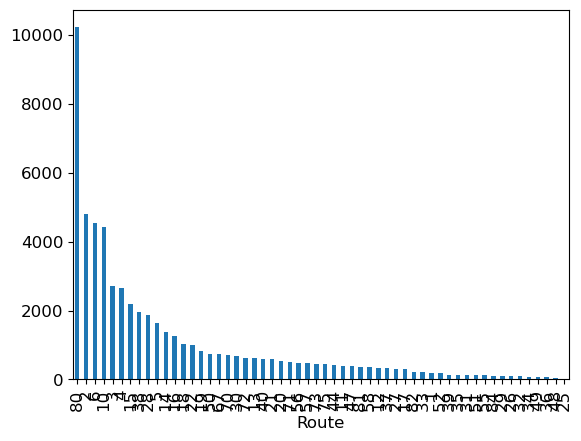

In [43]:
s.plot.bar()

### How can we slice a pandas dataframe?
- Recall that .iloc allows us to do slicing.
- For reproducing previous 5-route plot, we just need to take first 5 route details and populate into a series s.
- For the "other" part, we want all the rows in dataframe after row 5 summed up together.

In [44]:
s = df['daily'].iloc[:5]
other_boardings = df["daily"].iloc[5:].sum()
s["other"] = other_boardings

In [45]:
s.plot.bar()
# Q: Where did the xlabel come from? 
# A: the index of s (from the set_index call on df)

<Axes: xlabel='Route'>

Let's fix the plot aesthetics.

Text(0, 0.5, 'Rides / Day (Thousands)')

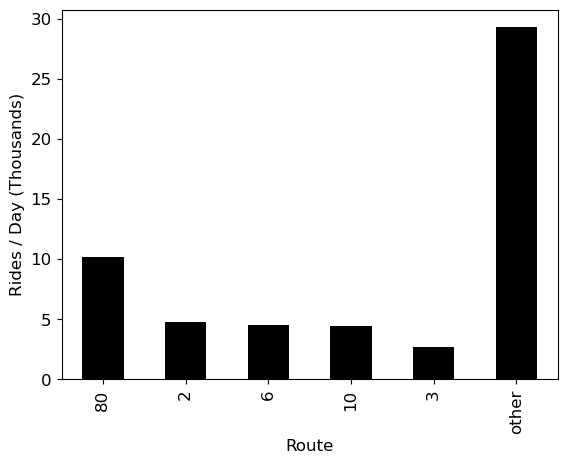

In [47]:
ax = (s / 1000).plot.bar(color = "k")
ax.set_ylabel("Rides / Day (Thousands)")

In [48]:
# Close the bus.db database connection here
conn.close()

Now, let's try a different dataset.

### IRIS dataset: http://archive.ics.uci.edu/ml/datasets/iris
- This set of data is used in beginning Machine Learning Courses
- You can train a ML algorithm to use the values to predict the class of iris
- Dataset link: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

#### Warmup 1:  Downloading IRIS dataset (https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

In [51]:
# use requests to get this URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get(url)

# check that the request was successful
response.raise_for_status()

# open a file called "iris.csv" for writing the data locally
file_obj = open("iris.csv", 'w')

# write the text of response to the file object
file_obj.write(response.text)

# close the file object
file_obj.close()

# Look at the file you downloaded. What's wrong with it?

#### Warmup 2: Making a DataFrame

In [52]:
# read the "iris.csv" file into a Pandas dataframe
iris_df = pd.read_csv("iris.csv")

# display the head of the data frame
iris_df.head()

5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa

#### Warmup 3: Our CSV file has no header. Let's add column names.
- Refer to the documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [53]:
# Attribute Information:
# 1. sepal length in cm
# 2. sepal width in cm
# 3. petal length in cm
# 4. petal width in cm
# 5. class: Iris Setosa, Iris Versicolour, Iris Virginica

# These should be our headers 
# ["sep-length", "sep-width", "pet-length", "pet-width", "class"]

iris_df = pd.read_csv("iris.csv",
                 names = ["sep-length", "sep-width", "pet-length", "pet-width", "class"])
iris_df.head()

sep-length  sep-width  pet-length  pet-width        class
0         5.1        3.5         1.4        0.2  Iris-setosa
1         4.9        3.0         1.4        0.2  Iris-setosa
2         4.7        3.2         1.3        0.2  Iris-setosa
3         4.6        3.1         1.5        0.2  Iris-setosa
4         5.0        3.6         1.4        0.2  Iris-setosa

#### Warmup 4: Connect to our database version of this data!

In [57]:
path = "iris-flowers.db"
assert os.path.exists(path)

iris_conn = sqlite3.connect(path)
pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'", iris_conn)

type  name tbl_name  rootpage  \
0  table  iris     iris         2   

                                                 sql  
0  CREATE TABLE "iris" (\n"sep-length" REAL,\n  "...

#### Warmup 5: Using SQL, get the 10 'Iris-setosa' flowers with the longest sepal length.
Break any ties by ordering by the shortest sepal width.

In [60]:
pd.read_sql("""
    SELECT *
    FROM iris
    WHERE class = 'Iris-setosa'
    ORDER BY `sep-length` DESC, `sep-width` ASC
    LIMIT 10
""", iris_conn)

sep-length  sep-width  pet-length  pet-width        class
0         5.8        4.0         1.2        0.2  Iris-setosa
1         5.7        3.8         1.7        0.3  Iris-setosa
2         5.7        4.4         1.5        0.4  Iris-setosa
3         5.5        3.5         1.3        0.2  Iris-setosa
4         5.5        4.2         1.4        0.2  Iris-setosa
5         5.4        3.4         1.7        0.2  Iris-setosa
6         5.4        3.4         1.5        0.4  Iris-setosa
7         5.4        3.7         1.5        0.2  Iris-setosa
8         5.4        3.9         1.7        0.4  Iris-setosa
9         5.4        3.9         1.3        0.4  Iris-setosa

## Scatter Plots
**Learning Objectives**
- Set the marker, color, and size of scatter plot data
- Calculate correlation between DataFrame columns
- Use subplots to group scatterplot data

## Set the marker, color, and size of scatter plot data

To start, let's look at some made-up data about Trees.
The city of Madison maintains a database of all the trees they care for.

In [61]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
trees_df = DataFrame(trees)
trees_df.head()

age  height  diameter
0    1     1.5       0.8
1    1     1.9       1.2
2    1     1.8       1.4
3    2     1.8       0.9
4    2     2.5       1.5

### Scatter Plots
We can make a scatter plot of a DataFrame using the following function...

`df_name.plot.scatter(x = "x_col_name", y = "y_col_name", \
                     color = "red", marker = "*", s = 50)`

Plot the trees data comparing a tree's age to its height...
 - What is `df_name`?
 - What is `x_col_name`?
 - What is `y_col_name`?

In [64]:
# TODO: change y to diameter
trees_df.plot.scatter(x = 'age', y='height')

<Axes: xlabel='age', ylabel='height'>

Now plot with a little more beautification...
 - Use a new [color](https://matplotlib.org/3.5.0/_images/sphx_glr_named_colors_003.png)
 - Use a type of [marker](https://matplotlib.org/stable/api/markers_api.html)
 - Change the size (any int)

<Axes: xlabel='age', ylabel='height'>

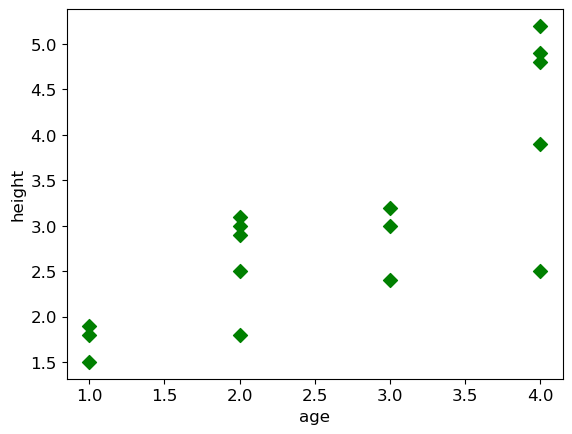

In [65]:
# Plot with some more beautification options.
trees_df.plot.scatter(x = "age", y = "height", color = "g",  marker = "D", s = 50) 
# D for diamond

Text(0.5, 1.0, 'Tree Age vs Height')

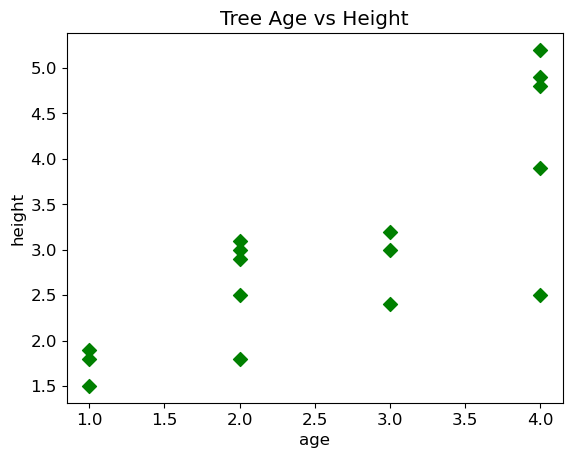

In [66]:
# Add a title to your plot.
ax = trees_df.plot.scatter(x = "age", y = "height", color = "g", marker = "D", s = 50) 
# D for diamond
ax.set_title("Tree Age vs Height")

#### Correlation

In [67]:
# What is the correlation between our DataFrame columns?
corr_df = trees_df.corr()
corr_df

age    height  diameter
age       1.000000  0.797468  0.854578
height    0.797468  1.000000  0.839345
diameter  0.854578  0.839345  1.000000

In [68]:
# What is the correlation between age and height (don't use .iloc)
# Using index in this case isn't considered as hardcoding
corr_df['age']['height']

0.7974683544303798

### Variating Stylistic Parameters

<Axes: xlabel='age', ylabel='height'>

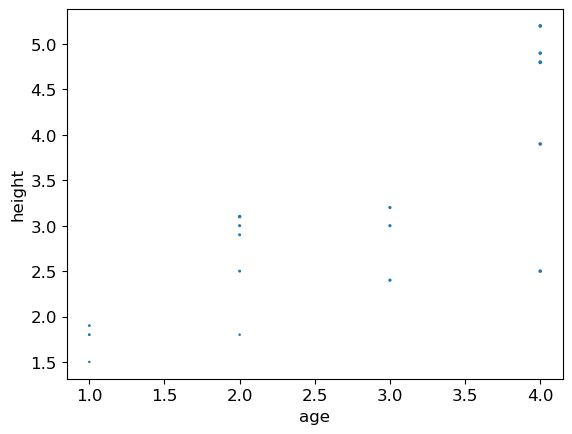

In [69]:
# Option 1:
trees_df.plot.scatter(x = "age", y = "height",  marker = "H", s = "diameter")

<Axes: xlabel='age', ylabel='height'>

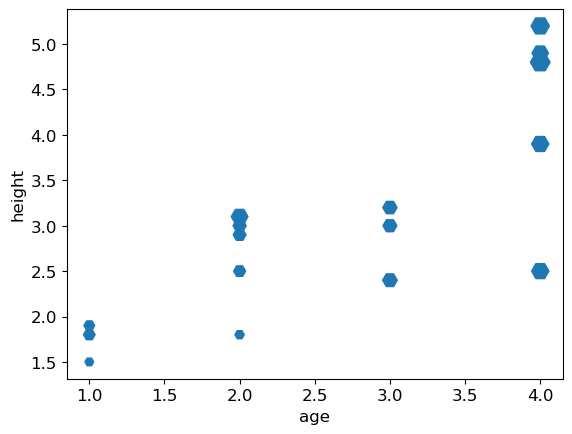

In [70]:
# Option 2:
# this way allows you to make it bigger
trees_df.plot.scatter(x = "age", y = "height", marker = "H", s = trees_df["diameter"] * 50) 

## Use subplots to group scatterplot data

### Re-visit the Iris Data


In [71]:
iris_df

sep-length  sep-width  pet-length  pet-width           class
0           5.1        3.5         1.4        0.2     Iris-setosa
1           4.9        3.0         1.4        0.2     Iris-setosa
2           4.7        3.2         1.3        0.2     Iris-setosa
3           4.6        3.1         1.5        0.2     Iris-setosa
4           5.0        3.6         1.4        0.2     Iris-setosa
..          ...        ...         ...        ...             ...
145         6.7        3.0         5.2        2.3  Iris-virginica
146         6.3        2.5         5.0        1.9  Iris-virginica
147         6.5        3.0         5.2        2.0  Iris-virginica
148         6.2        3.4         5.4        2.3  Iris-virginica
149         5.9        3.0         5.1        1.8  Iris-virginica

[150 rows x 5 columns]

### How do we create a *scatter plot* for various *class types*?
First, gather all the class types.

In [72]:
# In Pandas
varietes = list(set(iris_df["class"]))
varietes

['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

In [73]:
# In SQL
varietes = list(pd.read_sql("""
    SELECT DISTINCT class
    FROM iris
""", iris_conn)["class"])
varietes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In reality, you can choose to write Pandas or SQL queries (or a mix of both!). For the rest of this lecture, we'll use Pandas.

In [74]:
# If you want to continue using SQL instead, don't close the connection!
iris_conn.close()

<Axes: xlabel='pet-width', ylabel='pet-length'>

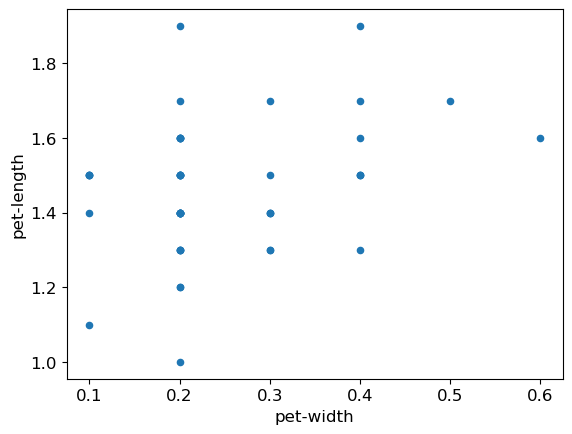

In [75]:
# Plot petal width vs petal length for flowers that are of class iris-setosa
iris_df[iris_df["class"] == 'Iris-setosa'].plot.scatter(x = "pet-width", y = "pet-length")

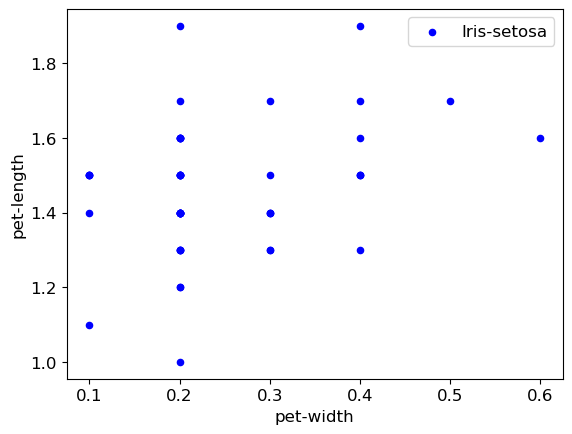

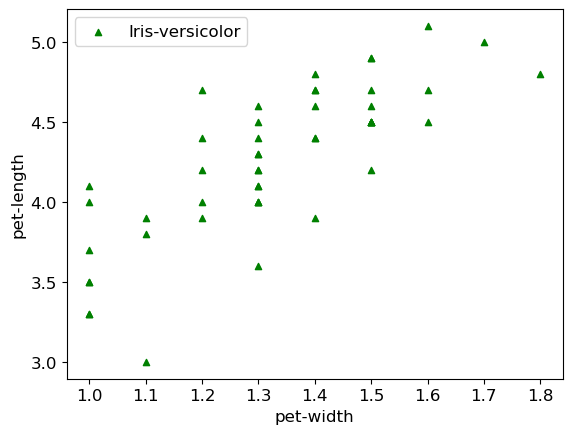

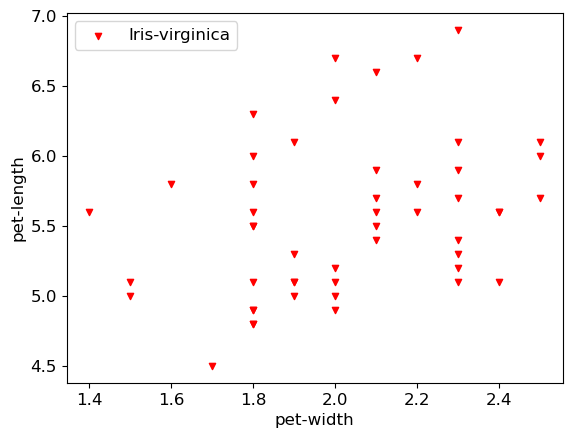

In [76]:
# Write a for loop that iterates through each variety in classes
# and makes a plot for only that class

# For each class add a color and a marker style
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]

for i in range(len(varietes)):
    variety = varietes[i]
    
    # make a df just of just the data for this variety
    variety_df = iris_df[iris_df["class"] == variety] 
    
    #make a scatter plot for this variety
    variety_df.plot.scatter(x = "pet-width", y = "pet-length", \
                            label = variety, color = colors[i], marker = markers[i])

Did you notice that it made 3 plots?!?! What's decieving about this?

### We can make Subplots in plots, called an AxesSubplot, keyword ax
1. if AxesSuplot ax passed, then plot in that subplot
2. if ax is None, create a new AxesSubplot
3. return AxesSubplot that was used

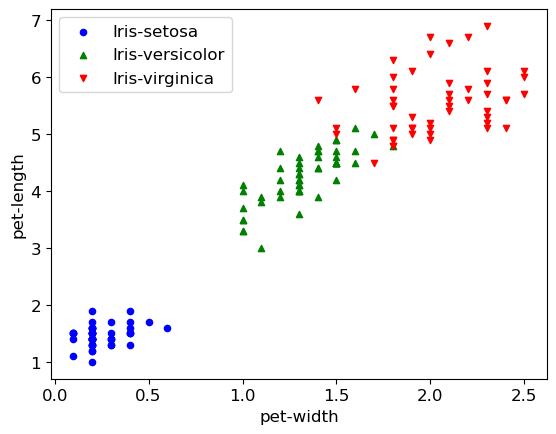

In [77]:
# complete this code to make 3 plots in one

plot_area = None   # don't change this...look at this variable in line 12
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]
for i in range(len(varietes)):
    variety = varietes[i]
    
    # make a df just of just the data for this variety
    variety_df = iris_df[iris_df["class"] == variety] 
    
    #make a scatter plot for this variety
    plot_area = variety_df.plot.scatter(x = "pet-width", y = "pet-length", \
                                        label = variety, color = colors[i], marker = markers[i], \
                                        ax = plot_area)

### Let's focus on "Iris-virginica" data

In [82]:
iris_virginica = iris_df[iris_df['class'] == 'Iris-virginica']
assert(len(iris_virginica) == 50)
iris_virginica.head()

sep-length  sep-width  pet-length  pet-width           class
100         6.3        3.3         6.0        2.5  Iris-virginica
101         5.8        2.7         5.1        1.9  Iris-virginica
102         7.1        3.0         5.9        2.1  Iris-virginica
103         6.3        2.9         5.6        1.8  Iris-virginica
104         6.5        3.0         5.8        2.2  Iris-virginica

<Axes: xlabel='pet-width', ylabel='pet-length'>

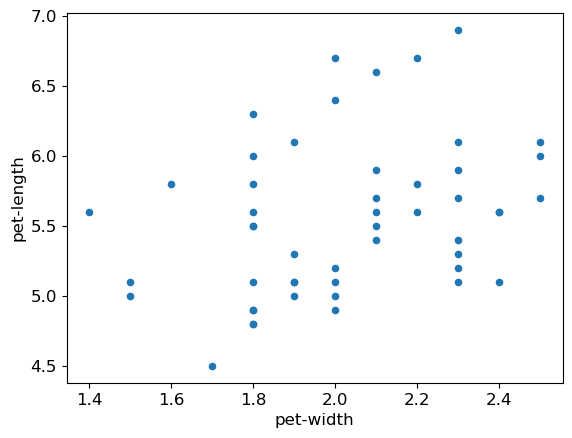

In [83]:
iris_virginica.plot.scatter(x = "pet-width", y = "pet-length")

### Let's learn about *xlim* and *ylim*
- Allows us to set x-axis and y-axis limits
- Takes either a single value (LOWER-BOUND) or a tuple containing two values (LOWER-BOUND, UPPER-BOUND)
- You need to be careful about setting the UPPER-BOUND

In [84]:
iris_virginica.plot.scatter(x = "pet-width", y = "pet-length", xlim = 0, ylim = 0)

<Axes: xlabel='pet-width', ylabel='pet-length'>

In [85]:
ax = iris_virginica.plot.scatter(x = "pet-width", y = "pet-length",
                    xlim = (0, 6), ylim = (0, 6),
                    figsize = (3, 3))

# What is wrong with this plot?


What is the maximum pet-len?

In [87]:
iris_virginica['pet-length'].max()

6.9

In [88]:
ax.get_ylim()

(0.0, 6.0)

Let's include assert statements to make sure we don't crop the plot!

In [89]:
ax = iris_virginica.plot.scatter(x = "pet-width", y = "pet-length",
                     xlim = (0, 6), ylim = (0, 6),
                     figsize = (3, 3))
assert iris_virginica["pet-length"].max() <= ax.get_ylim()[1]

AssertionError: 

### Now let's try all 4 assert statements

```
assert iris_virginica[ax.get_xlabel()].min() >= ax.get_xlim()[0]
assert iris_virginica[ax.get_xlabel()].max() <= ax.get_xlim()[1]
assert iris_virginica[ax.get_ylabel()].min() >= ax.get_ylim()[0]
assert iris_virginica[ax.get_ylabel()].max() <= ax.get_ylim()[1]
```

In [90]:
ax = iris_virginica.plot.scatter(x = "pet-width", y = "pet-length",
                     xlim = (0, 7), ylim = (0, 7),
                     figsize = (3, 3))
assert iris_virginica[ax.get_xlabel()].min() >= ax.get_xlim()[0]
assert iris_virginica[ax.get_xlabel()].max() <= ax.get_xlim()[1]
assert iris_virginica[ax.get_ylabel()].min() >= ax.get_ylim()[0]
assert iris_virginica[ax.get_ylabel()].max() <= ax.get_ylim()[1]

### Time-Permitting
Plot this data in an interesting/meaningful way & identify any correlations.

In [91]:
students = pd.DataFrame({
    "name": [
        "Cole",
        "Cynthia",
        "Alice",
        "Seth"
    ],
    "grade": [
        "C",
        "AB",
        "B",
        "BC"
    ],
    "gpa": [
        2.0,
        3.5,
        3.0,
        2.5
    ],
    "attendance": [
        4,
        11,
        10,
        6
    ],
    "height": [
        68,
        66,
        60,
        72
    ]
})
students

name grade  gpa  attendance  height
0     Cole     C  2.0           4      68
1  Cynthia    AB  3.5          11      66
2    Alice     B  3.0          10      60
3     Seth    BC  2.5           6      72

In [92]:
# Min, Max, and Overall Difference in Student Height
min_height = students["height"].min()
max_height = students["height"].max()
diff_height = max_height - min_height

# Normalize students heights on a scale of [0, 1] (black to white)
height_colors = (students["height"] - min_height) / diff_height

# Normalize students heights on a scale of [0, 0.5] (black to gray)
height_colors = height_colors / 2 

# Color must be a string (e.g. c='0.34')
height_colors = height_colors.astype("string")

height_colors

0    0.3333333333333333
1                  0.25
2                   0.0
3                   0.5
Name: height, dtype: string

<Axes: xlabel='attendance', ylabel='gpa'>

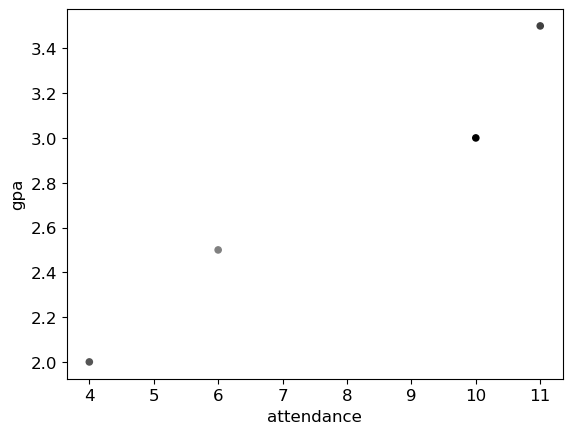

In [93]:
students.plot.scatter(x="attendance", y="gpa", c=height_colors)

In [94]:
students.corr()

/var/folders/07/v8h5vw9j6v71xlj9rgbrh5h40000gn/T/ipykernel_74543/882796491.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  students.corr()


gpa  attendance    height
gpa         1.000000    0.976831 -0.464758
attendance  0.976831    1.000000 -0.635586
height     -0.464758   -0.635586  1.000000